In [3]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:22pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

<b><font size="7" color="red">ch10. N차원(Numpy배열)배열 다루기</font></b>

##4.1 할당

In [ ]:
import numpy as np

In [ ]:
a is b

In [7]:
a==b

NameError: name 'a' is not defined

In [5]:
np.all(a==b)

NameError: name 'np' is not defined

In [8]:
## 4.2 얕은 복사 : 뷰

In [10]:
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
c = a.view() #얕은복사
print(id(a), id(c))

2887422809392 2887446129104


In [18]:
c==a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [21]:
c.shape = (2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [23]:
c[1,::2]  =[9,9,9]
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 9,  7,  9,  9,  9, 11]])

In [24]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 9,  7,  9,  9,  9, 11]])

# 4.3 깊은복사

In [29]:
import numpy as np

35a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
a = np.array([[5,5,15,0],
              [99,6,16,1],
              [20,5,14,0]])

In [34]:
x = a[:,:-1]
x

array([[ 5,  5, 15],
       [99,  6, 16],
       [20,  5, 14]])

In [35]:
x[:,0]= -9 #슬라이싱이 될 때 뷰가 반환됨(얕은복사)

In [39]:
x = a[:, :-1].copy() #깊은복사
c = np.array(a[:, :-1], copy=True)
x

array([[-9,  5, 15],
       [-9,  6, 16],
       [-9,  5, 14]])

In [37]:
a

array([[-9,  5, 15,  0],
       [-9,  6, 16,  0],
       [-9,  5, 14,  0]])

# 5절 고급인덱싱

## 5.1 인덱스 배열로 인덱싱

In [ ]:
import numpy as np
a = np.arange(12)**2
a

In [14]:
a[[0,5,9]]

array([ 0, 25, 81])

In [15]:
i = np.array([0,1,1,9])
a[i]

array([ 0,  1,  1, 81])

In [18]:
i = np.array([[0,1],
             [1,9]])
a[i]

array([[ 0,  1],
       [ 1, 81]])

In [21]:
a[i] =  10
a

array([ 10,  10,   4,   9,  16,  25,  36,  49,  64,  10, 100, 121])

In [22]:
a[i] += 10
a

array([ 20,  20,   4,   9,  16,  25,  36,  49,  64,  20, 100, 121])

In [23]:
#색상
palette= np.array([[0,0,0],  #black
                   [255,0,0],#red
                   [0,255,0],#green
                   [0,0,255],#blue
                   [255,255,255]])#white

In [25]:
image_data = [[[255,255,255],[255,255,255],[255,255,255],[255,255,255]]]
image_data

[[[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]]]

In [27]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]
image_data.shape

(10, 10, 3)

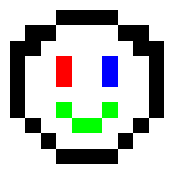

In [33]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.axis('off')
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [34]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [35]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [36]:
a[a%2==0] # 논리 배열을 이용한 인덱싱시 True인 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [37]:
a[a>15]

array([16, 17, 18, 19])

## 6절 선형대수
- 2차원 넘파이 배열을 행렬
    * 행렬곱: @
    * 단윟행렬 : np.eye(n) : n행렬 단위행렬
    * 전치행렬 :X.T, X.transepose
    * 역행렬: np.linalg.inv(a)

In [39]:
a = np.array([[1,2], [3,4]])
a

array([[1, 2],
       [3, 4]])

In [40]:
# a의 역행렬: a의 역행렬 @ a=단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [41]:
np.linalg.inv(a) @ a

array([[ 1.00000000e+00,  4.44089210e-16],
       [-5.55111512e-17,  1.00000000e+00]])

In [47]:
#정방행렬이 아닌면 역행렬을 구할수 없음
a = np.array([[1,2,1], [3,4,1]])
#np.linalg.inv(a)
a.T @ a

array([[10, 14,  4],
       [14, 20,  6],
       [ 4,  6,  2]])

In [48]:
#정치행렬을 곱하면 정방행렬
a @ a.T

array([[ 6, 12],
       [12, 26]])

In [52]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data()

TypeError: 'numpy.ndarray' object is not callable

In [53]:
## 6.1 t선형연립 방정식 풀기(단변량 회기분석): 독립변수, 데이터 =2

In [ ]:
## 6.2 t선형연립 방정식 풀기(단변량 회기분석): 독립변수, 데이터 n개